# Parameter sweep

Grid search over strategy parameters to find the best combo. Uses `run_parameter_sweep` which handles the loop + metric extraction.

In [1]:
import sandtable as st
from sandtable.data_types.metric import Metric

In [2]:
data = st.DataHandler(
    provider=st.CSVProvider("../data/fixtures"),
    universe=["SPY"]
)
data.load("2019-01-01", "2023-12-31")

## MA Crossover sweep

Try a bunch of fast/slow period combinations and optimize for Sharpe.

In [3]:
sweep = st.run_parameter_sweep(
    strategy_class=st.MACrossoverStrategy,
    param_grid={
        "fast_period": [5, 10, 15, 20],
        "slow_period": [30, 50, 75, 100],
    },
    data=data,
    metric=st.Metric.SHARPE_RATIO,
    initial_capital=100_000,
)

print(f"Best params: {sweep.best_params}")
print(f"Best Sharpe: {sweep.best_result.metrics.sharpe_ratio:.3f}")

[2026-02-22 18:26:13] INFO:sandtable.api: Starting parameter sweep: 16 combinations over ['fast_period', 'slow_period']
[2026-02-22 18:26:13] INFO:sandtable.api: Running backtest: MACrossoverStrategy on ['SPY']
[2026-02-22 18:26:13] INFO:sandtable.core.backtest: Starting backtest: SPY with 1258 bars
[2026-02-22 18:26:14] INFO:sandtable.core.backtest: Backtest complete: processed 1258 bars
[2026-02-22 18:26:14] INFO:sandtable.api: Backtest finished: return=1.58%, sharpe=0.17
[2026-02-22 18:26:14] INFO:sandtable.api: Running backtest: MACrossoverStrategy on ['SPY']
[2026-02-22 18:26:14] INFO:sandtable.core.backtest: Starting backtest: SPY with 1258 bars
[2026-02-22 18:26:14] INFO:sandtable.core.backtest: Backtest complete: processed 1258 bars
[2026-02-22 18:26:14] INFO:sandtable.api: Backtest finished: return=1.40%, sharpe=0.15
[2026-02-22 18:26:14] INFO:sandtable.api: Running backtest: MACrossoverStrategy on ['SPY']
[2026-02-22 18:26:14] INFO:sandtable.core.backtest: Starting backtest: 

Best params: {'fast_period': 10, 'slow_period': 100}
Best Sharpe: 0.418


In [4]:
sweep.to_dataframe().sort_values(Metric.SHARPE_RATIO, ascending=False).head(10)

,fast_period,slow_period,total_return,sharpe_ratio,sortino_ratio,max_drawdown,num_trades,win_rate
7,10,100,0.040877,0.417603,0.598025,0.029173,17,0.294118
5,10,50,0.026651,0.276478,0.395137,0.032942,27,0.333333
6,10,75,0.017888,0.192351,0.270213,0.027767,23,0.260870
3,5,100,0.017997,0.188436,0.262534,0.037662,27,0.259259
15,20,100,0.016580,0.172265,0.237711,0.038415,11,0.272727
0,5,30,0.015755,0.171396,0.244407,0.025898,39,0.358974
1,5,50,0.013998,0.153421,0.217474,0.034394,35,0.342857
10,15,75,0.010718,0.116711,0.163953,0.043707,19,0.263158
9,15,50,0.004199,0.052824,0.074451,0.043727,21,0.380952
4,10,30,0.002201,0.032127,0.045315,0.033762,37,0.351351


## Heatmap data

`heatmap_data()` pivots two parameters into a matrix you can plot.

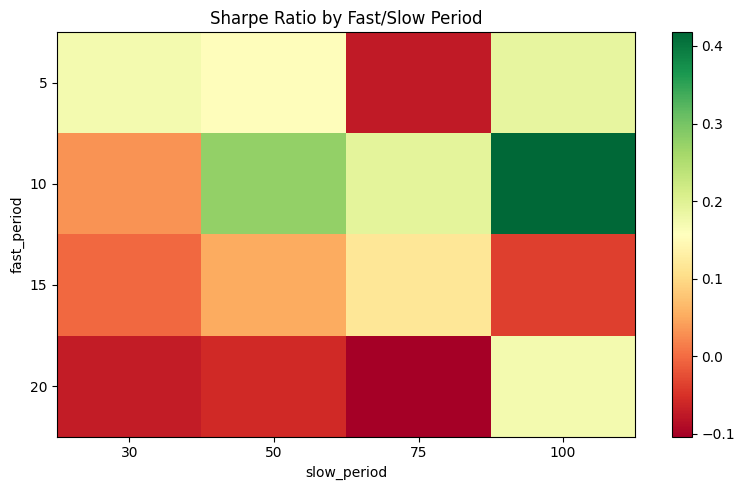

In [5]:
import matplotlib.pyplot as plt

hm = sweep.heatmap_data("fast_period", "slow_period")

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(hm.values, cmap="RdYlGn", aspect="auto")
ax.set_xticks(range(len(hm.columns)))
ax.set_xticklabels(hm.columns)
ax.set_yticks(range(len(hm.index)))
ax.set_yticklabels(hm.index)
ax.set_xlabel("slow_period")
ax.set_ylabel("fast_period")
ax.set_title("Sharpe Ratio by Fast/Slow Period")
plt.colorbar(im, ax=ax)
plt.tight_layout()

## Mean Reversion sweep

In [6]:
sweep_mr = st.run_parameter_sweep(
    strategy_class=st.MeanReversionStrategy,
    param_grid={
        "lookback": [10, 20, 30, 50],
        "threshold": [1.5, 2.0, 2.5, 3.0],
    },
    data=data,
    metric=st.Metric.SHARPE_RATIO,
    initial_capital=100_000,
)

print(f"Best params: {sweep_mr.best_params}")
print(f"Best Sharpe: {sweep_mr.best_result.metrics.sharpe_ratio:.3f}")
print(f"Best Return: {sweep_mr.best_result.metrics.total_return:.2%}")

[2026-02-22 18:26:16] INFO:sandtable.api: Starting parameter sweep: 16 combinations over ['lookback', 'threshold']
[2026-02-22 18:26:16] INFO:sandtable.api: Running backtest: MeanReversionStrategy on ['SPY']
[2026-02-22 18:26:16] INFO:sandtable.core.backtest: Starting backtest: SPY with 1258 bars
[2026-02-22 18:26:16] INFO:sandtable.core.backtest: Backtest complete: processed 1258 bars
[2026-02-22 18:26:16] INFO:sandtable.api: Backtest finished: return=0.84%, sharpe=0.16
[2026-02-22 18:26:16] INFO:sandtable.api: Running backtest: MeanReversionStrategy on ['SPY']
[2026-02-22 18:26:16] INFO:sandtable.core.backtest: Starting backtest: SPY with 1258 bars
[2026-02-22 18:26:17] INFO:sandtable.core.backtest: Backtest complete: processed 1258 bars
[2026-02-22 18:26:17] INFO:sandtable.api: Backtest finished: return=1.19%, sharpe=0.47
[2026-02-22 18:26:17] INFO:sandtable.api: Running backtest: MeanReversionStrategy on ['SPY']
[2026-02-22 18:26:17] INFO:sandtable.core.backtest: Starting backtest:

Best params: {'lookback': 50, 'threshold': 3.0}
Best Sharpe: 0.637
Best Return: 2.42%


In [7]:
sweep_mr.to_dataframe().sort_values(Metric.SHARPE_RATIO, ascending=False)

,lookback,threshold,total_return,sharpe_ratio,sortino_ratio,max_drawdown,num_trades,win_rate
15,50,3.0,0.024248,0.637011,0.893269,0.012987,0,0.000000
7,20,3.0,0.012363,0.621847,0.859300,0.006565,0,0.000000
11,30,3.0,0.011753,0.602841,0.837623,0.006569,0,0.000000
14,50,2.5,0.027453,0.600791,0.834374,0.015814,8,0.875000
2,10,2.5,0.003358,0.513986,0.710812,0.002207,0,0.000000
5,20,2.0,0.018261,0.488423,0.669985,0.012839,34,0.764706
6,20,2.5,0.015749,0.471742,0.635429,0.015554,4,0.750000
1,10,2.0,0.011856,0.471669,0.636382,0.010437,24,0.750000
10,30,2.5,0.010730,0.373766,0.504164,0.013078,5,0.600000
4,20,1.5,0.017582,0.265867,0.369072,0.026759,112,0.544643
